In [2]:
# only for google collab

!pip install https://github.com/chengs/tqdm/archive/colab.zip

from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/Project:GAN/Deep_Vision_Project")


  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47867 sha256=439afce32172d1ea6d598c95313c65080bdb5a631c592e6c40d2823aa2a20a8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-dx3cxbnq/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# load data
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
Batch_size = 100
dataset_train = datasets.CIFAR10(root='./data', train=True, download=True, transform = transforms.ToTensor())
data_loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = Batch_size, shuffle = True, drop_last= True)
dataset_test = datasets.CIFAR10(root='./data', train=False, download=True, transform = transforms.ToTensor())
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = Batch_size, shuffle = True, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified


# CGAN


In [ ]:

import torch
from CGAN_model import CGAN

In [ ]:

model = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
             Picture_size = 32, Batch_size = Batch_size, use_cuda = True)

/pytorch/aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


epoch: 0


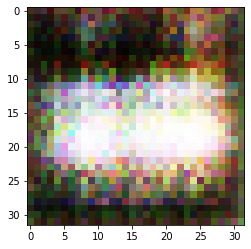

label: ship


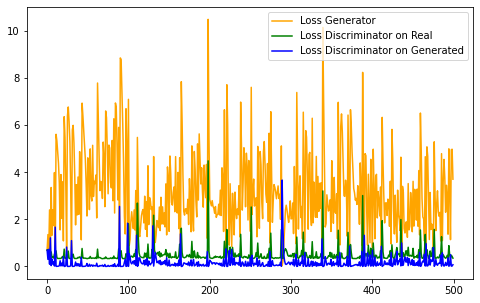

epoch: 5


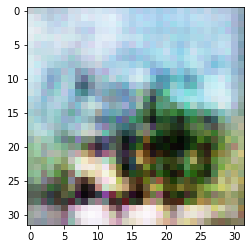

label: horse


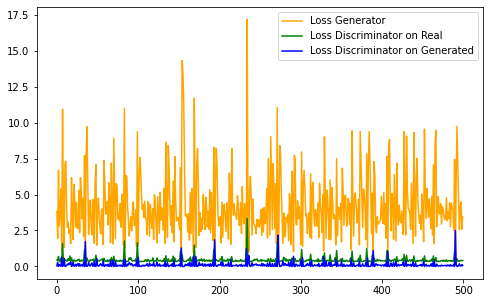

epoch: 10


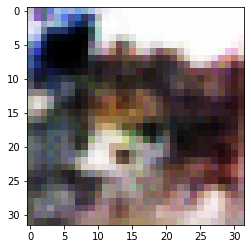

label: automobile


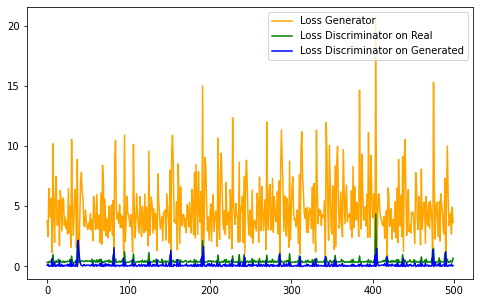

epoch: 15


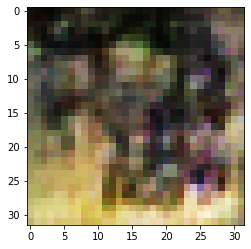

label: cat


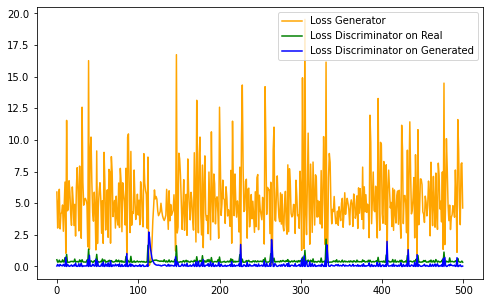

epoch: 20


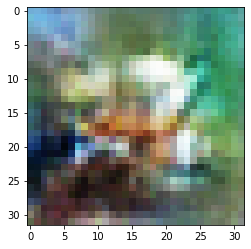

label: horse


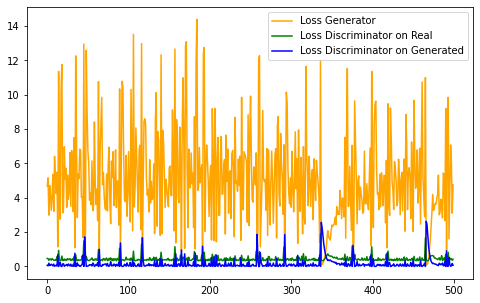

epoch: 25


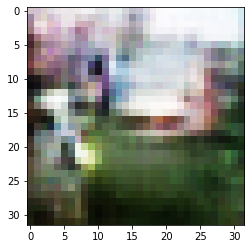

label: cat


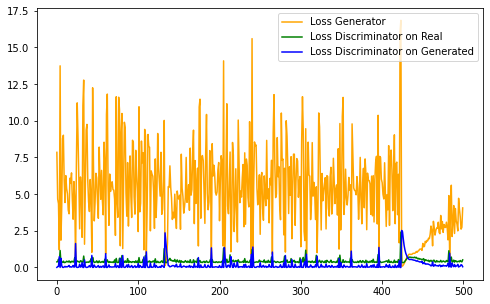

epoch: 30


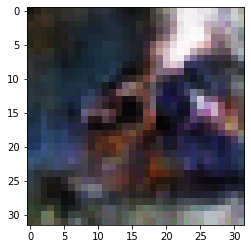

label: automobile


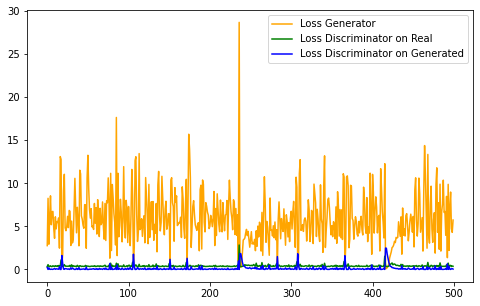

epoch: 35


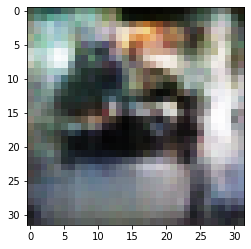

label: horse


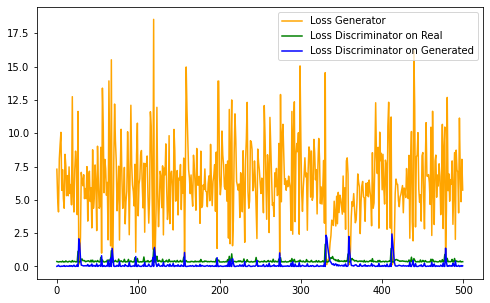

epoch: 40


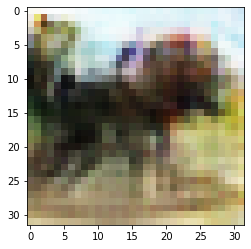

label: bird


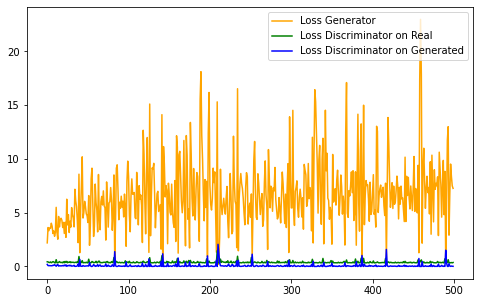

epoch: 45


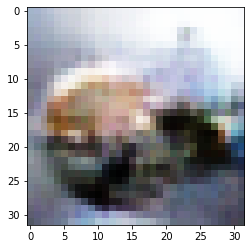

label: truck


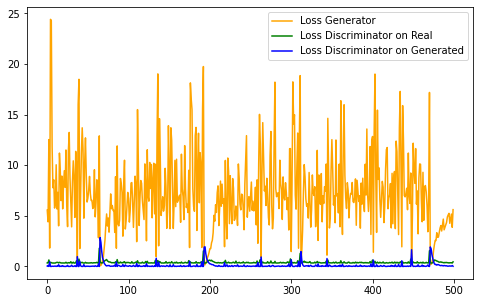

epoch: 50


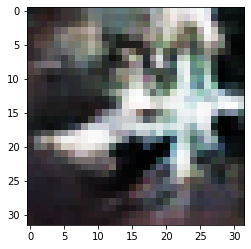

label: automobile


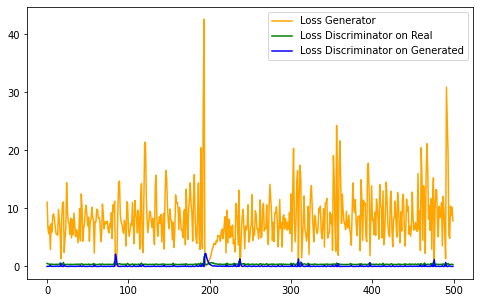

epoch: 55


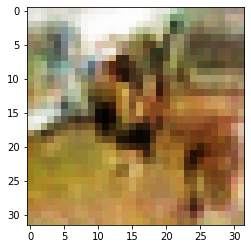

label: bird


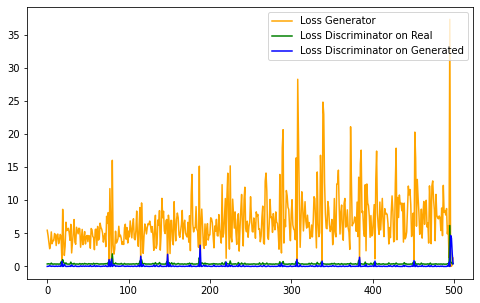

epoch: 60


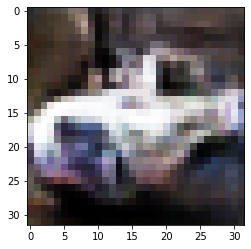

label: truck


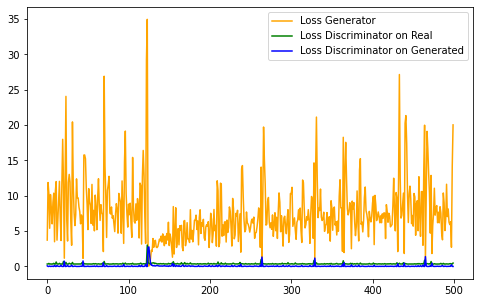

epoch: 65


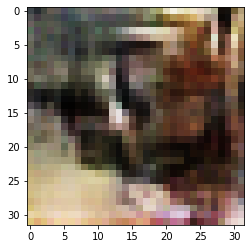

label: dog


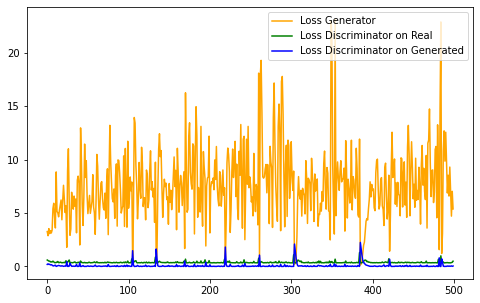

epoch: 70


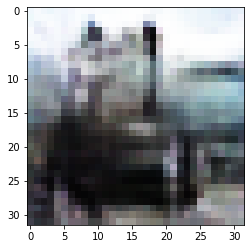

label: ship


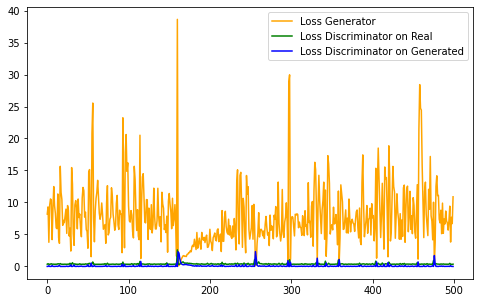

epoch: 75


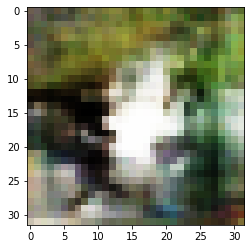

label: automobile


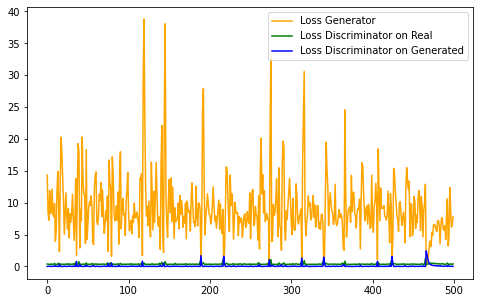

epoch: 80


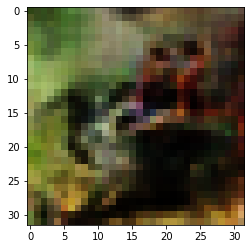

label: bird


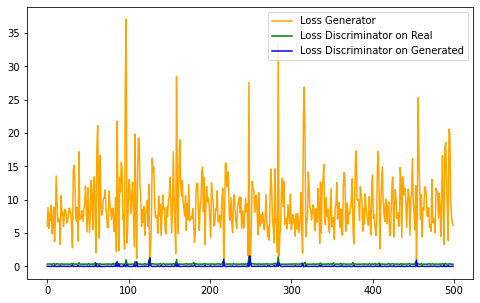

epoch: 85


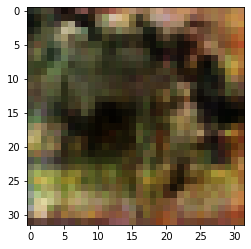

label: deer


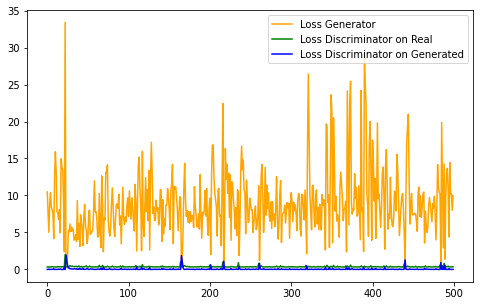

epoch: 90


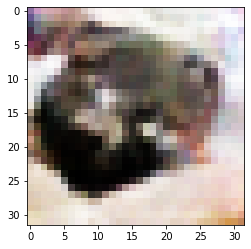

label: dog


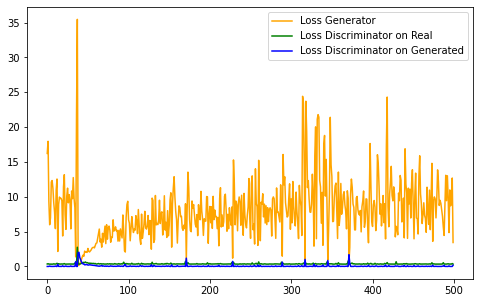

epoch: 95


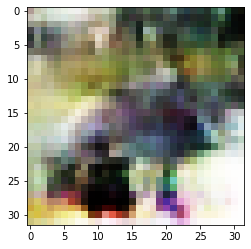

label: deer


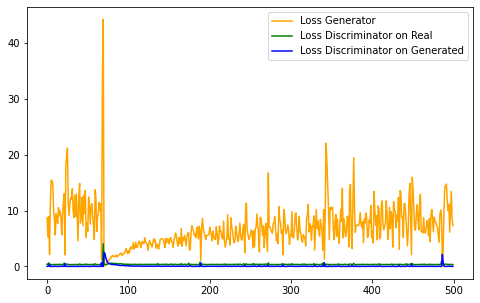

epoch: 99


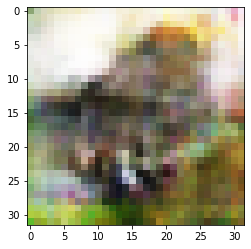

label: automobile


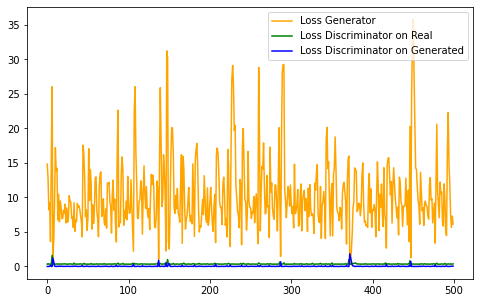

In [ ]:
model.train(num_epochs = 100, dataloader = data_loader_train)

# MSG-CGAN

In [4]:
from MSG_CGAN_model import MSG_CGAN

In [53]:
model = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = True,
                 weights_Generator = "./weights/MSG_CGAN_gen_e99.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e99.ckpt")

/pytorch/aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


epoch: 90


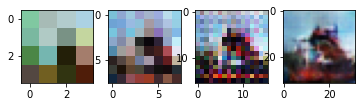

label: ship


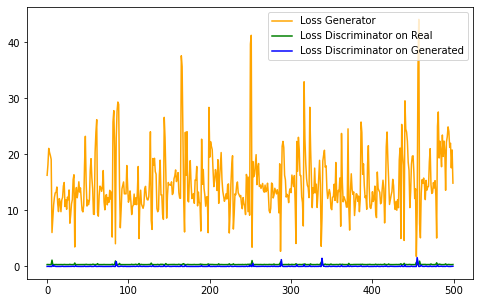

epoch: 95


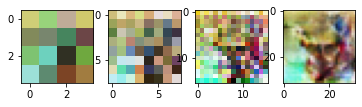

label: cat


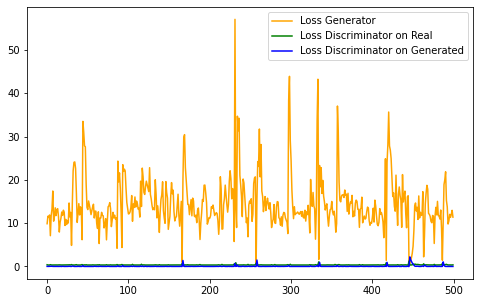

epoch: 99


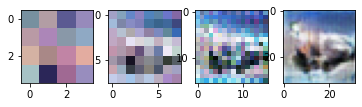

label: airplane


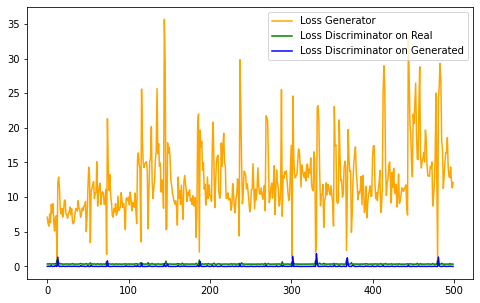

In [ ]:
model.train(num_epochs=100, dataloader= data_loader_train, already_trained_epochs= 90)

In [ ]:
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

pictures, labels = model.generate_example(100)
for j in range(100):
  plt.figure(figsize=(10,10)) 
  for i in range(4):
    ii = pictures[i][j]
    ii = ii.cpu()
    Img = F.to_pil_image(ii)
    plt.subplot(1,4, i + 1,xticks=[], yticks=[] )
    plt.imshow(Img)
  plt.tight_layout
  plt.show()
  print("label: " + model.class_names[labels[j].item()])

# MSG with different learning rate

In [3]:
from MSG_CGAN_model import MSG_CGAN

In [7]:
model = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = True,
                 lr_gen = 0.0001, lr_disc = 0.0004, spec = "diff_lr_",
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e50.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e50.ckpt")

epoch: 55


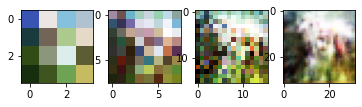

label: horse


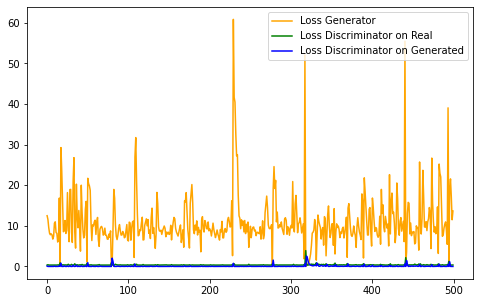

epoch: 60


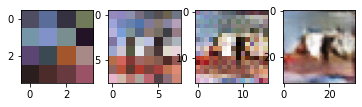

label: ship


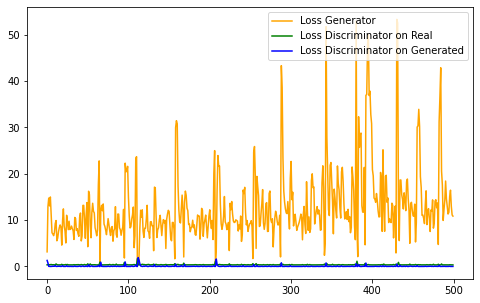

epoch: 65


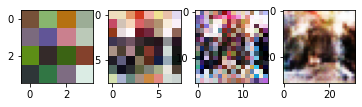

label: horse


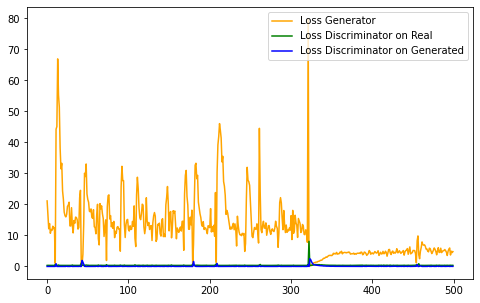

epoch: 70


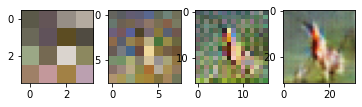

label: airplane


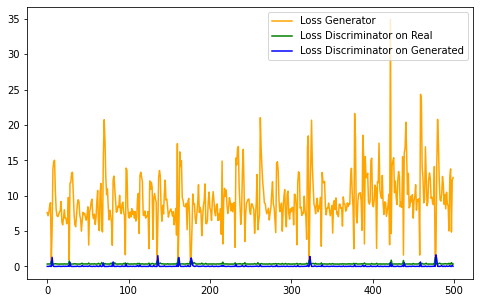

epoch: 75


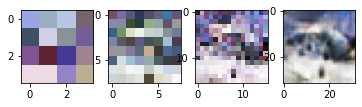

label: airplane


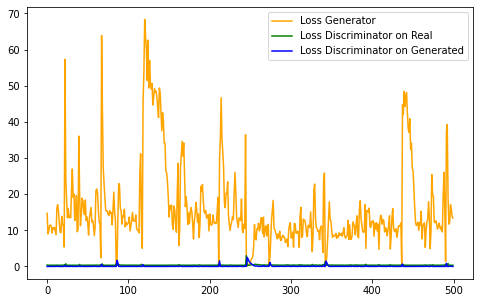

epoch: 80


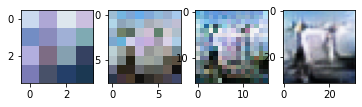

label: ship


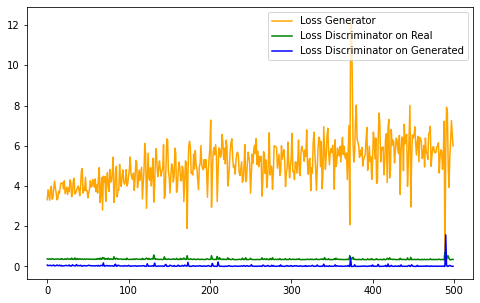

epoch: 85


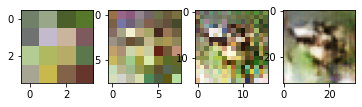

label: frog


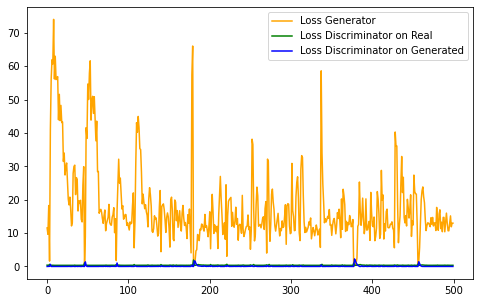

epoch: 90


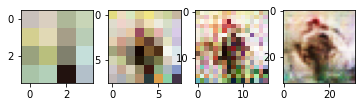

label: bird


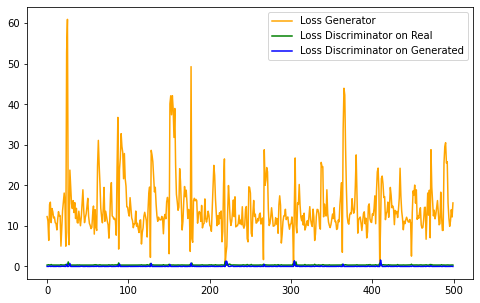

epoch: 95


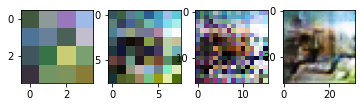

label: automobile


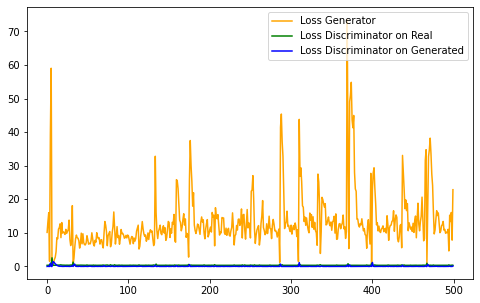

epoch: 99


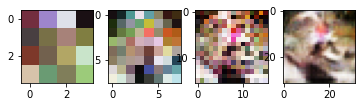

label: truck


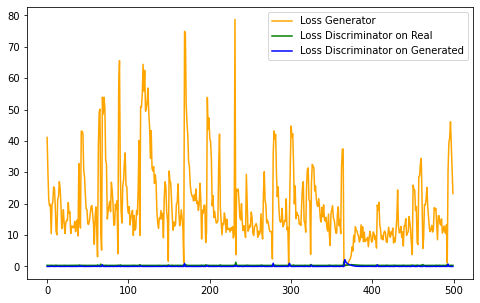

In [8]:
model.train(num_epochs=100, dataloader= data_loader_train , feedback_freq= 5, already_trained_epochs= 51)

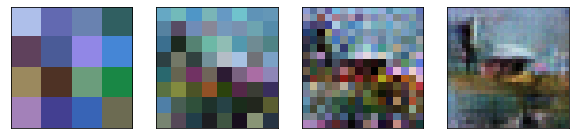

label: ship


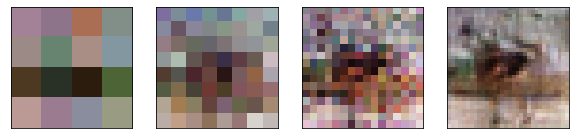

label: dog


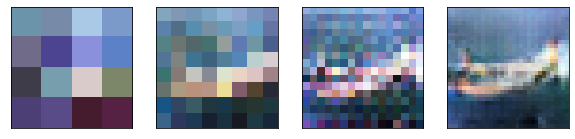

label: ship


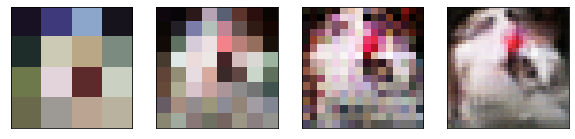

label: horse


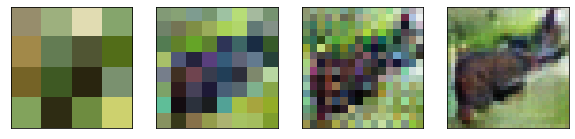

label: deer


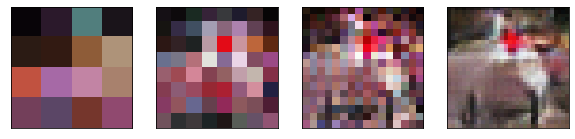

label: deer


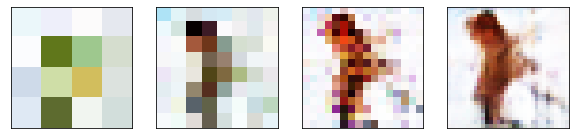

label: frog


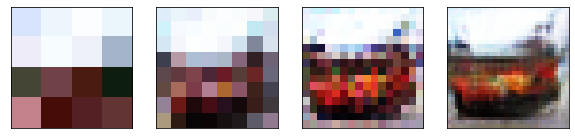

label: automobile


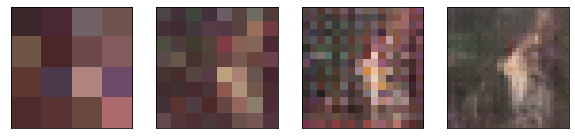

label: dog


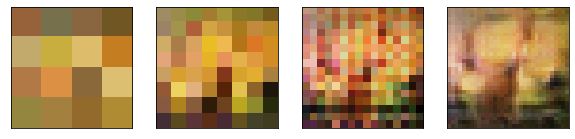

label: bird


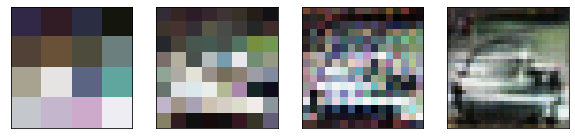

label: truck


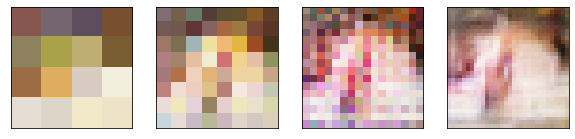

label: dog


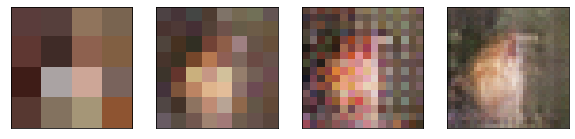

label: dog


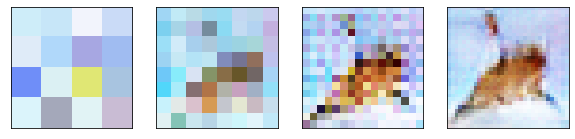

label: deer


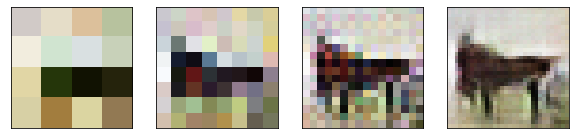

label: horse


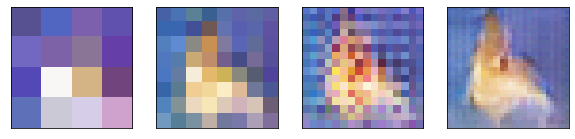

label: deer


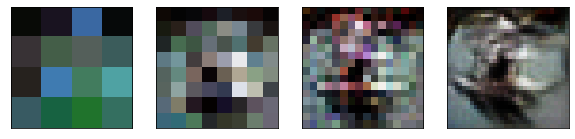

label: truck


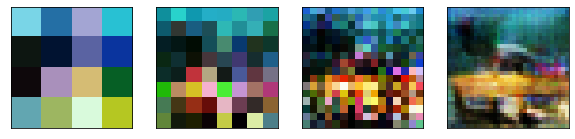

label: truck


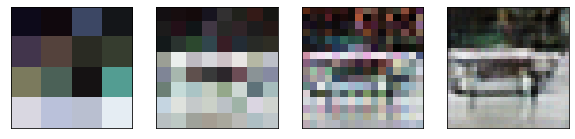

label: truck


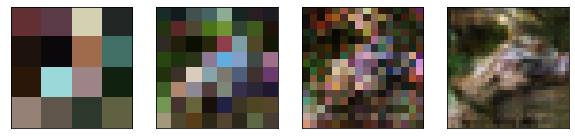

label: bird


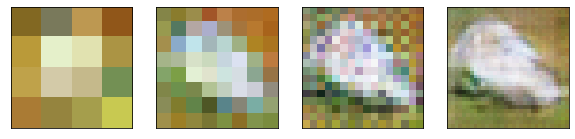

label: bird


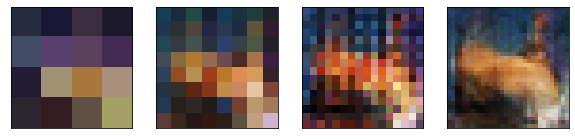

label: frog


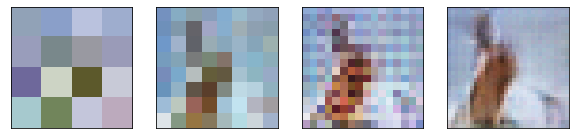

label: horse


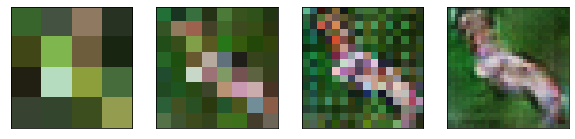

label: cat


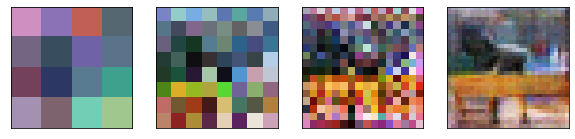

label: deer


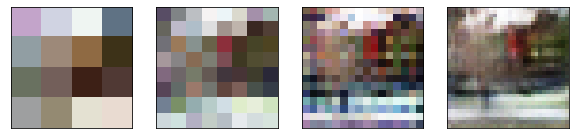

label: cat


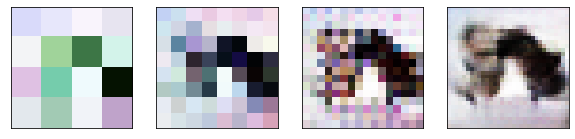

label: ship


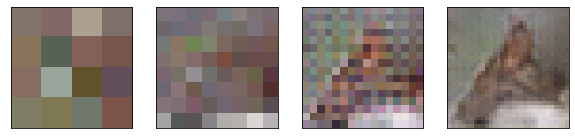

label: cat


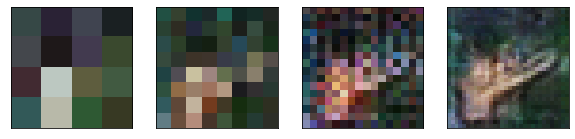

label: frog


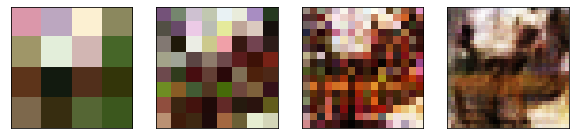

label: frog


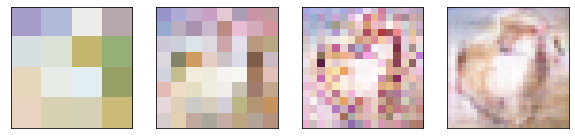

label: deer


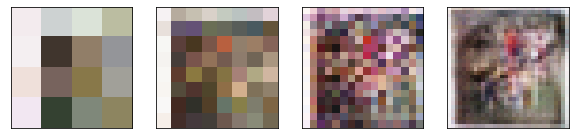

label: frog


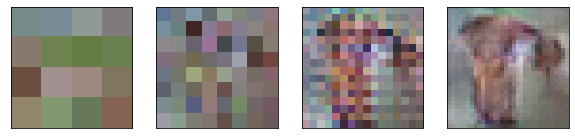

label: horse


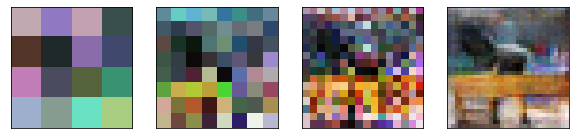

label: cat


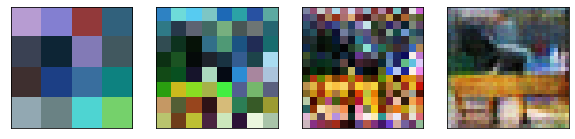

label: dog


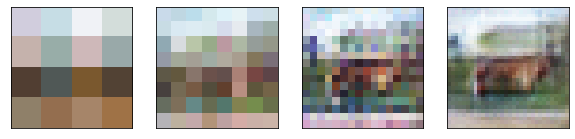

label: horse


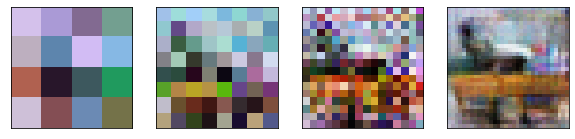

label: ship


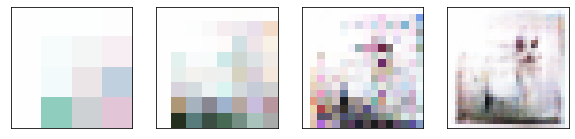

label: airplane


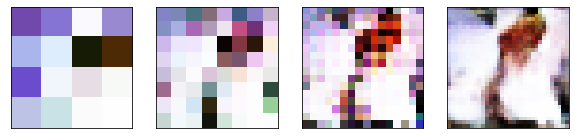

label: bird


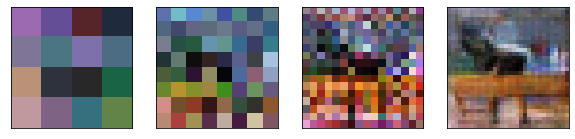

label: horse


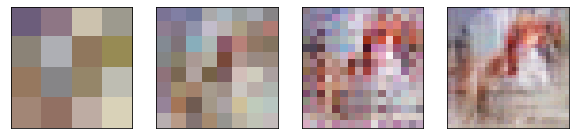

label: cat


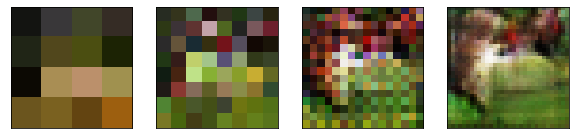

label: cat


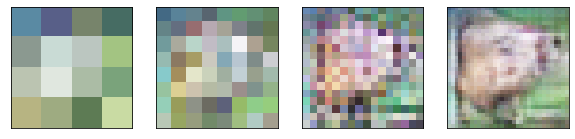

label: bird


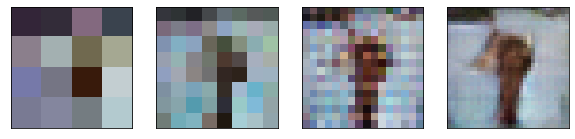

label: bird


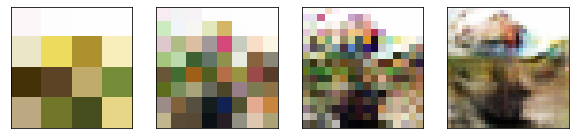

label: truck


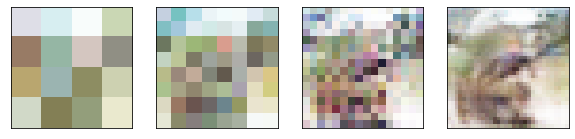

label: cat


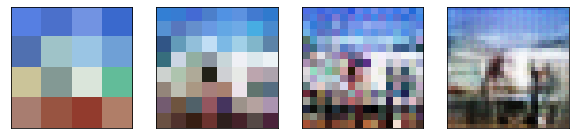

label: truck


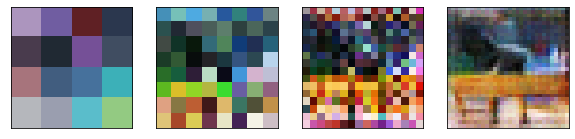

label: frog


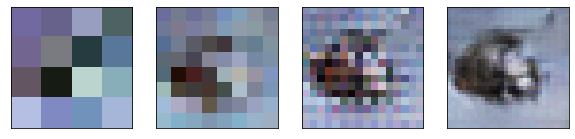

label: truck


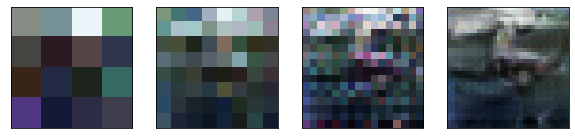

label: ship


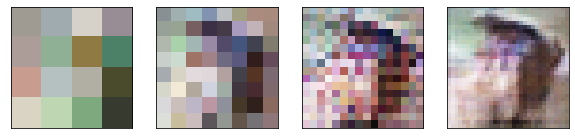

label: cat


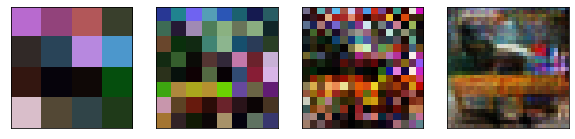

label: truck


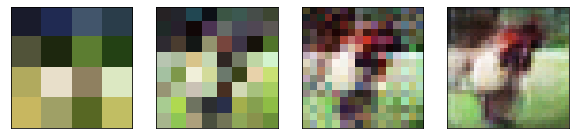

label: deer


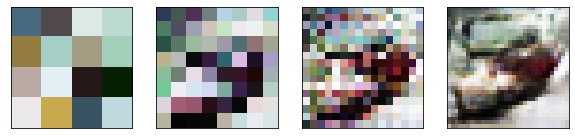

label: truck


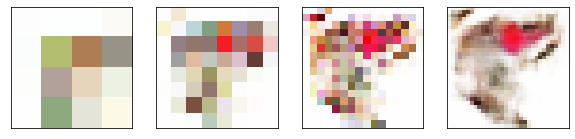

label: cat


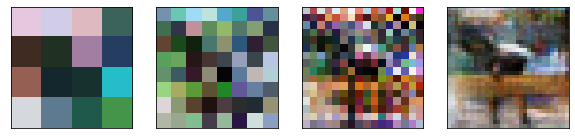

label: dog


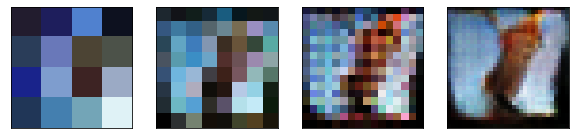

label: bird


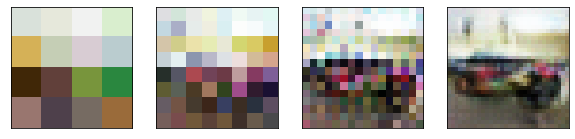

label: ship


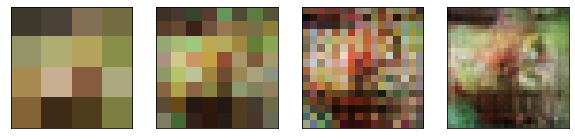

label: frog


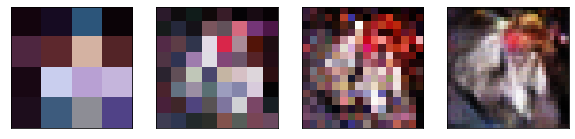

label: cat


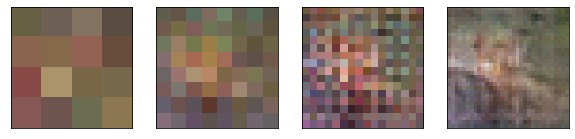

label: frog


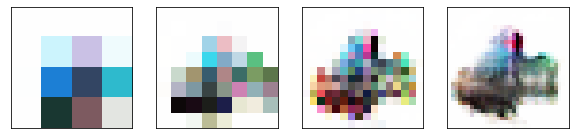

label: truck


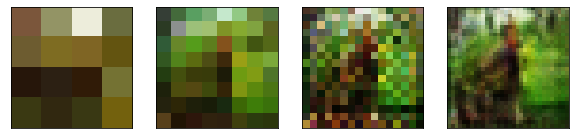

label: frog


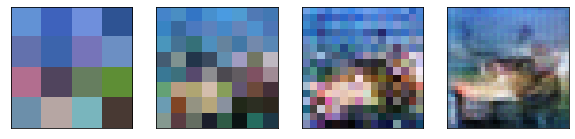

label: ship


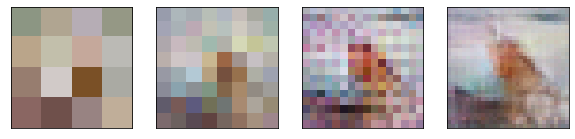

label: bird


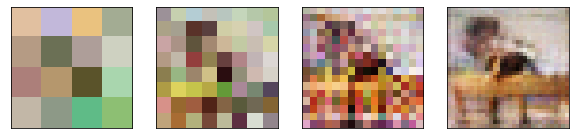

label: frog


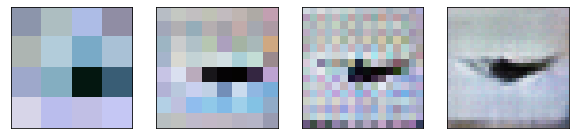

label: airplane


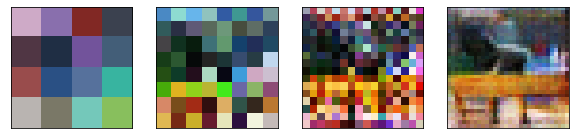

label: frog


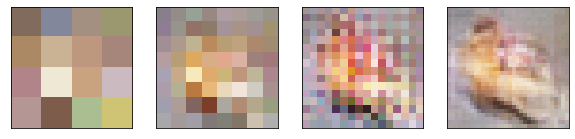

label: deer


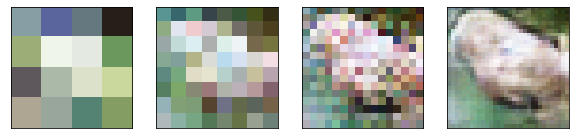

label: horse


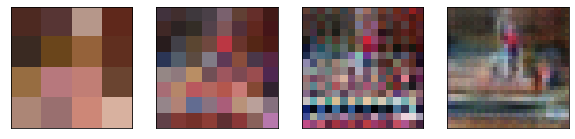

label: cat


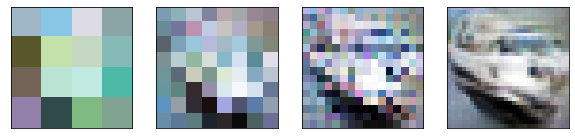

label: truck


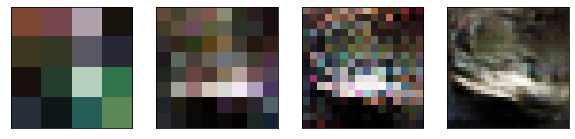

label: ship


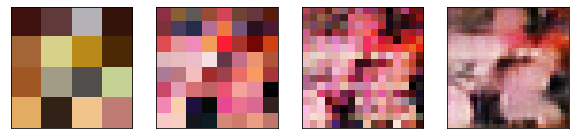

label: airplane


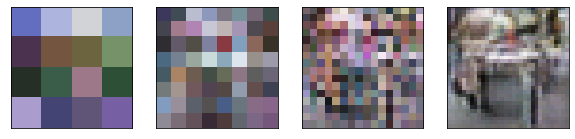

label: automobile


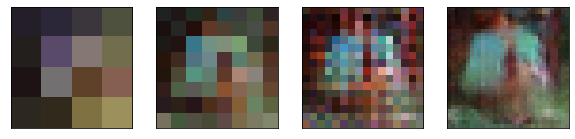

label: deer


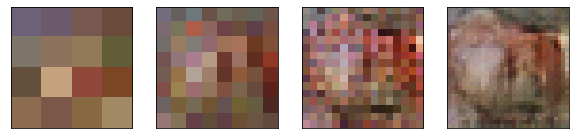

label: frog


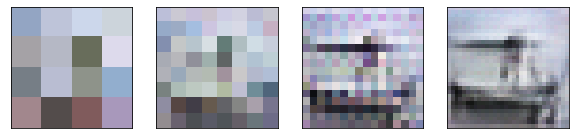

label: automobile


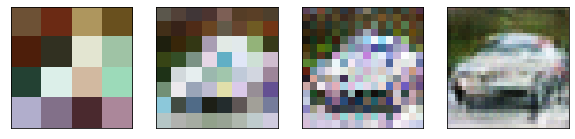

label: truck


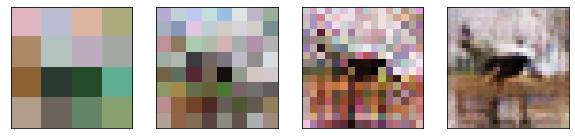

label: dog


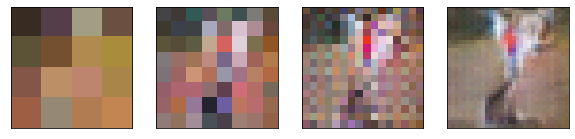

label: bird


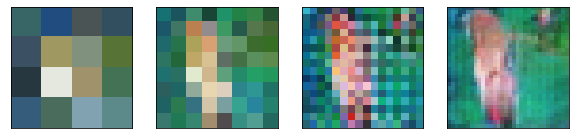

label: dog


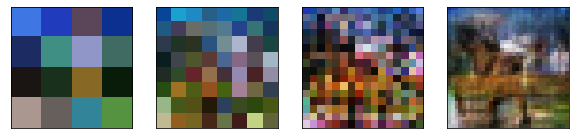

label: bird


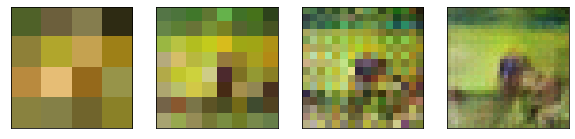

label: dog


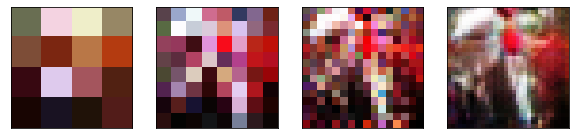

label: bird


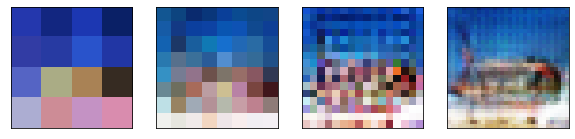

label: airplane


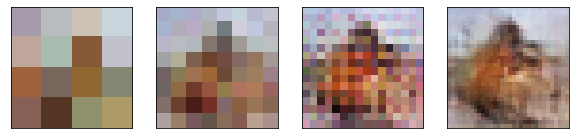

label: cat


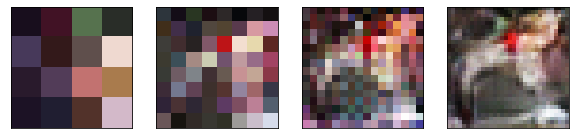

label: deer


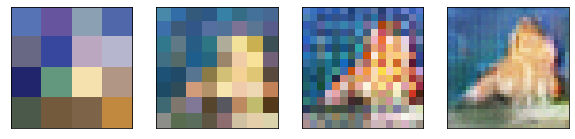

label: horse


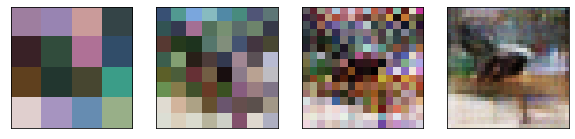

label: bird


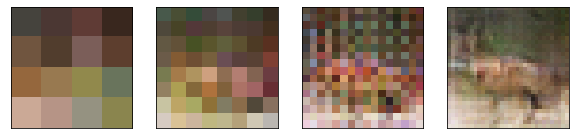

label: frog


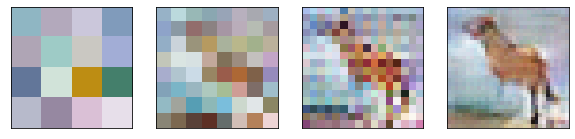

label: bird


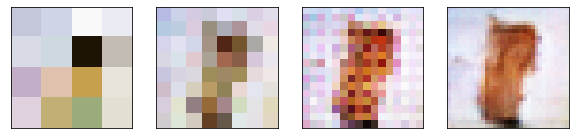

label: dog


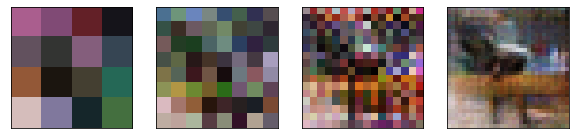

label: cat


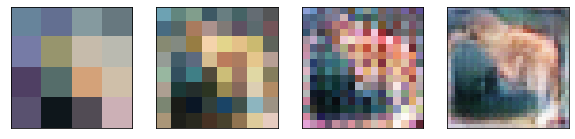

label: cat


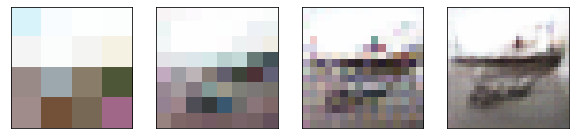

label: ship


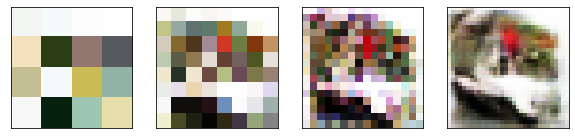

label: automobile


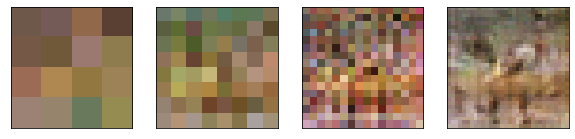

label: frog


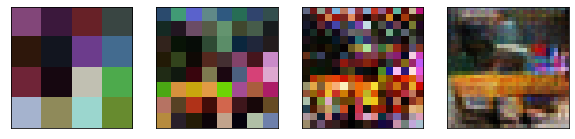

label: truck


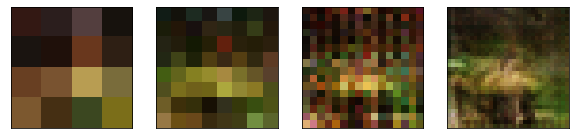

label: deer


In [10]:
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

pictures, labels = model.generate_example(100)
for j in range(100):
  plt.figure(figsize=(10,10)) 
  for i in range(4):
    ii = pictures[i][j]
    ii = ii.cpu()
    Img = F.to_pil_image(ii)
    plt.subplot(1,4, i + 1,xticks=[], yticks=[] )
    plt.imshow(Img)
  plt.tight_layout
  plt.show()
  print("label: " + model.class_names[labels[j].item()])

# MSG-CGAN with even tinier learning rate

In [5]:
model = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 lr_gen = 0.00005, lr_disc = 0.0002, spec = "tinier_lr_",
                 weights_Generator = "./weights/tinier_lr_MSG_CGAN_gen_e60.ckpt",
                 weights_Discriminator = "./weights/tinier_lr_MSG_CGAN_disc_e60.ckpt")

In [ ]:
model.train(num_epochs=100, dataloader= data_loader_train, feedback_freq= 10, already_trained_epochs = 61)

/pytorch/aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.
